Research question: Does the description and genre of a movie influence...
- the popularity of the movie 
- the budgeting allocated to the movie
- the revenue the movie brings in

In [1]:
import pandas as pd
import numpy as np
from gensim.parsing.preprocessing import strip_punctuation,strip_multiple_whitespaces
import matplotlib.pyplot as plt

/Users/paolagonzalez/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('datasets/movies.csv')

In [3]:
data.head(5)

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...
2,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...
3,693134,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,2024-02-27,190000000.0,683813734.0,167.0,Released,Long live the fighters.,8.300,2770.0,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,epic-based on novel or book-fight-sandstorm-sa...,/czembW0Rk1Ke7lCJGahbOhdCuhV.jpg,/xOMo8BRK7PfcJv9JCnx7s5hj0PX.jpg,438631-763215-792307-1011985-467244-634492-359...
4,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,Super-Hero partners Scott Lang and Hope van Dy...,4425.387,Marvel Studios-Kevin Feige Productions,2023-02-15,200000000.0,475766228.0,125.0,Released,Witness the beginning of a new dynasty.,6.507,2811.0,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...,/qnqGbB22YJ7dSs4o6M7exTpNxPz.jpg,/m8JTwHFwX7I7JY5fPe4SjqejWag.jpg,823999-676841-868759-734048-267805-965839-1033...


In [4]:
data.shape

(722460, 20)

### Preprocess data

---

In [5]:
# Subset the data
data = data.drop(columns=['production_companies','runtime','status','tagline','credits','keywords','poster_path','backdrop_path','recommendations'])

In [6]:
# Distribution of null values
data.isna().sum()

id                        0
title                     4
genres               210485
original_language         0
overview             118340
popularity                0
release_date          51840
budget                    0
revenue                   0
vote_average              0
vote_count                0
dtype: int64

In [7]:
# Drop and fill in null values
data = data.dropna(subset=['title'])
data['genres'].fillna('none',inplace=True)
data['overview'].fillna('no description',inplace=True)
data['release_date'].fillna('no information',inplace=True)

In [8]:
# Drop data with no revenue
data = data[data['revenue']!=0]

In [9]:
# Final data format
data.head(5)

,id,title,genres,original_language,overview,popularity,release_date,budget,revenue,vote_average,vote_count
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,2023-08-02,129000000.0,352056482.0,7.079,1365.0
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,2023-04-05,18000000.0,65675816.0,7.433,545.0
2,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,2023-06-06,200000000.0,407045464.0,7.340,1007.0
3,693134,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,2024-02-27,190000000.0,683813734.0,8.300,2770.0
4,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,Super-Hero partners Scott Lang and Hope van Dy...,4425.387,2023-02-15,200000000.0,475766228.0,6.507,2811.0


In [10]:
data.shape

(17102, 11)

In [11]:
# Save the preprocessed dataset as CSV
data.to_csv('datasets/clean_movies.csv',index=False)

### Explore the data

---

In [12]:
# Fetch genre counts in the data
genres_raw = '-'.join(list(data['genres'])).split('-')
genres_ls = set(genres_raw)
genre_occurrences = {genre: genres_raw.count(genre) for genre in genres_ls}
genre_occurrences

{'Comedy': 5718,
 'History': 734,
 'Documentary': 742,
 'War': 500,
 'Action': 3480,
 'Science Fiction': 1303,
 'Animation': 1037,
 'Fantasy': 1316,
 'TV Movie': 41,
 'Romance': 2958,
 'Horror': 1760,
 'Western': 215,
 'Mystery': 1181,
 'Drama': 7822,
 'Crime': 2056,
 'Music': 667,
 'none': 656,
 'Thriller': 3347,
 'Family': 1486,
 'Adventure': 2161}

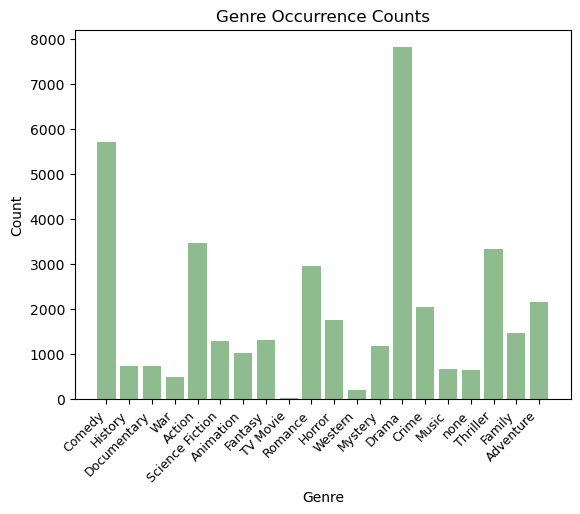

In [13]:
# Visualize the occurences of each genre in the data.
genres_dist = plt.bar(genre_occurrences.keys(),genre_occurrences.values(),color='darkseagreen')
plt.xticks(rotation=45, ha='right',fontsize=9)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Occurrence Counts')
plt.show()

The top five most popular genres in this dataset are drama, comedy, action, thriller, and romance. 

In [14]:
# Explore languages
print(f"There are {data['original_language'].nunique()} different languages in this dataset.")
print(f"These languages are: {data['original_language'].unique().tolist()}.")

There are 88 different languages in this dataset.
These languages are: ['en', 'fi', 'es', 'ja', 'fr', 'zh', 'cn', 'hi', 'ko', 'te', 'ru', 'pt', 'it', 'de', 'th', 'sr', 'no', 'tr', 'pl', 'id', 'sv', 'ga', 'da', 'ar', 'is', 'fa', 'nb', 'mk', 'tl', 'cs', 'el', 'uk', 'kn', 'la', 'ro', 'he', 'vi', 'hu', 'bn', 'ms', 'nl', 'ta', 'sk', 'ka', 'ml', 'hr', 'et', 'sw', 'ca', 'af', 'mi', 'sl', 'cy', 'ur', 'gl', 'ku', 'rw', 'am', 'iu', 'bg', 'xh', 'mr', 'hy', 'pa', 'bm', 'ne', 'eu', 'lt', 'gu', 'az', 'be', 'si', 'km', 'dz', 'xx', 'jv', 'zu', 'tg', 'sq', 'bs', 'lv', 'mo', 'lg', 'or', 'mn', 'ab', 'ht', 'dv'].


In [15]:
# Distribution of languages
data['original_language'].value_counts()

en    11380
es      712
fr      584
ja      463
ru      436
      ...  
ku        1
sl        1
la        1
ga        1
dv        1
Name: original_language, Length: 88, dtype: int64

The most popular language in this dataset is English with 11380 movies. The other languages following this are Spanish (712), French (584), Japanese (463), and Russian (436).

In [16]:
# Explore popularity
print(f"The lowest popularity score is {data['popularity'].min()}.")
print(f"The highest popularity score is {data['popularity'].max()}.")
# Most popular movie in the dataset
data[data['popularity']== data['popularity'].max()]

The lowest popularity score is 0.6.
The highest popularity score is 8763.998.


,id,title,genres,original_language,overview,popularity,release_date,budget,revenue,vote_average,vote_count
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,2023-08-02,129000000.0,352056482.0,7.079,1365.0


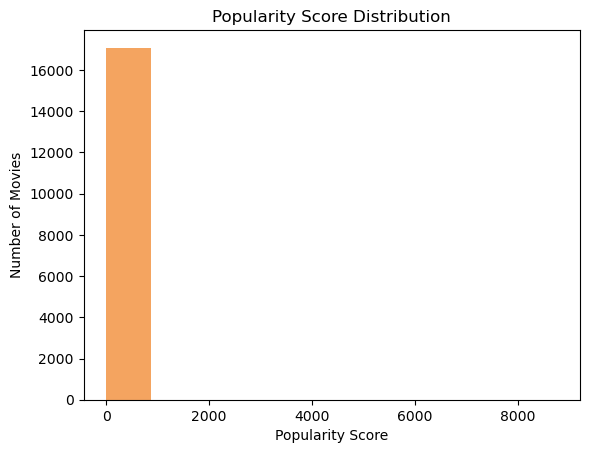

In [17]:
# Visualize popularity scores
plt.hist(data['popularity'],color='sandybrown')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Movies')
plt.title('Popularity Score Distribution')
plt.show()

A majority of the popularity scores are less than 100. This indiciates that not many movies are very popular in this dataset. We can analyze the pattern of a majority of the movies by only visualizing movies with a popularity score of less than 100.

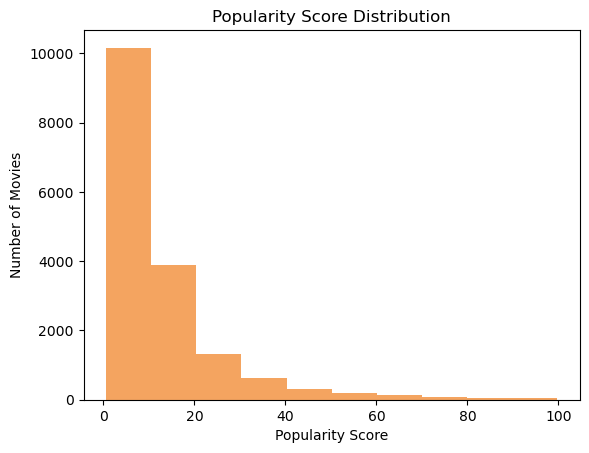

In [18]:
# Visualize data with a popularity score less than 100
ss = data[data['popularity']<100]['popularity']
plt.hist(ss,color='sandybrown')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Movies')
plt.title('Popularity Score Distribution')
plt.show()

From this visualization, we can see the popularity score is still rightly skewed. This indicates that a Gamma distribution may be a good model for exploring this part of the research question.

In [19]:
# Explore movie budgets
print(f"The lowest budget amount is {data['budget'].min()}.")
print(f"The highest budget amount is {data['budget'].max()}.")
# Most expensive movie
data[data['budget']== data['budget'].max()]

The lowest budget amount is 0.0.
The highest budget amount is 5000000000.0.


,id,title,genres,original_language,overview,popularity,release_date,budget,revenue,vote_average,vote_count
713928,761770,Humor Us! Presents: SOCIAL DISSOCIATION,none,en,Humor Us' first virtual show on 11/7/2020.,0.6,no information,5.000000e+09,5.0,0.0,0.0


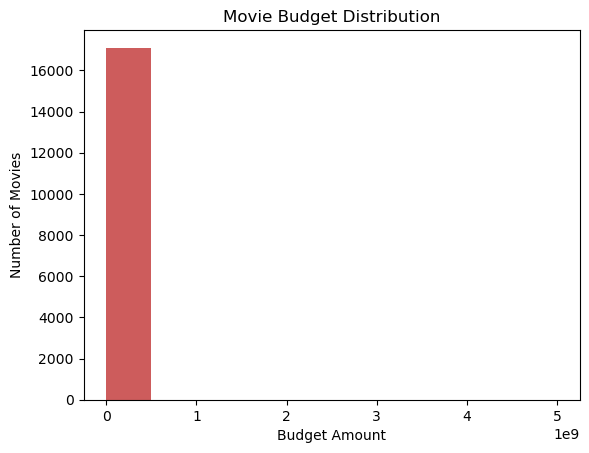

In [20]:
# Visualize movie budget distribution
plt.hist(data['budget'],color='indianred')
plt.xlabel('Budget Amount')
plt.ylabel('Number of Movies')
plt.title('Movie Budget Distribution')
plt.show()

From this visualization, it can be determined that a majority of the movie budgets in this dataset are less than 100 million dollars. We can analyze the distribution these movies by only visualizing movie budgets under 100 million.

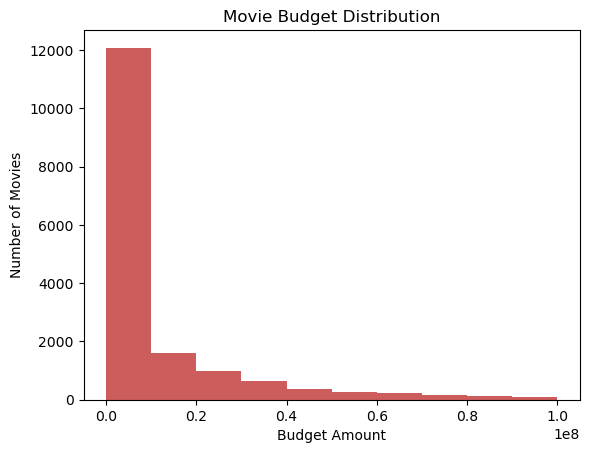

In [21]:
# Visualize distribution for movie budgets under 100 million
plt.hist(data[data['budget']<100000000]['budget'],color='indianred')
plt.xlabel('Budget Amount')
plt.ylabel('Number of Movies')
plt.title('Movie Budget Distribution')
plt.show()

From this visualization, we can see movie  is still rightly skewed. This indicates that a Gamma distribution may be a good model for exploring this part of the research question.

In [22]:
# Explore movie revenue
print(f"The lowest revenue amount is {data['revenue'].min()}.")
print(f"The highest revenue amount is {data['revenue'].max()}.")
# Most financially successful movie
data[data['revenue']== data['revenue'].max()]

The lowest revenue amount is -12.0.
The highest revenue amount is 2920357254.0.


,id,title,genres,original_language,overview,popularity,release_date,budget,revenue,vote_average,vote_count
137,19995,Avatar,Action-Adventure-Fantasy-Science Fiction,en,In the 22nd century a paraplegic Marine is dis...,296.05,2009-12-15,237000000.0,2.920357e+09,7.569,28943.0


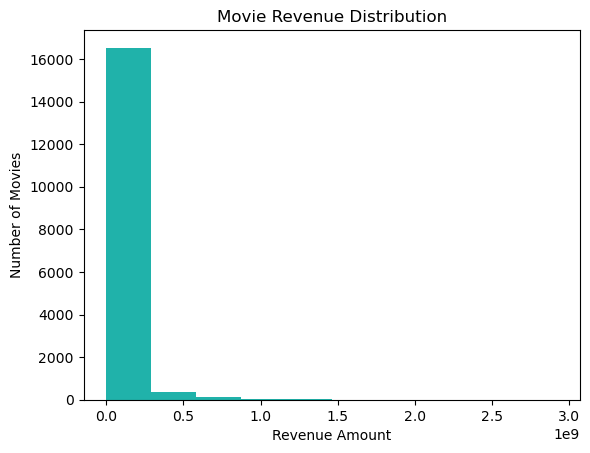

In [23]:
# Visualize movie revenue
plt.hist(data['revenue'],color='lightseagreen')
plt.xlabel('Revenue Amount')
plt.ylabel('Number of Movies')
plt.title('Movie Revenue Distribution')
plt.show()

Most of the movies do not make more than 100 million in revenue. We can analyze the revenue for these movies more closely by looking into those with revenue less than 100 million.

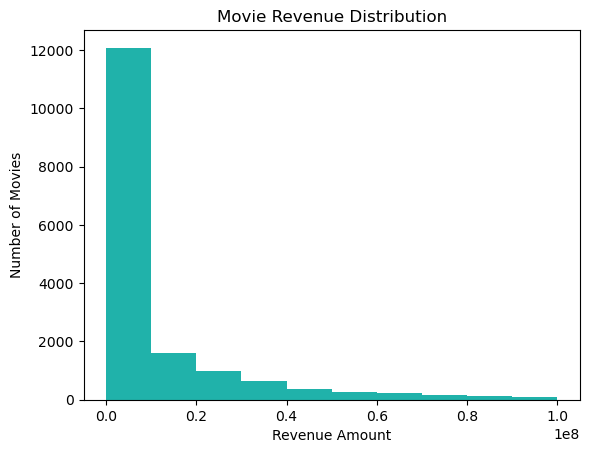

In [24]:
# Visualize counts for movie revenue under 100 million
plt.hist(data[data['budget']<100000000]['budget'],color='lightseagreen')
plt.xlabel('Revenue Amount')
plt.ylabel('Number of Movies')
plt.title('Movie Revenue Distribution')
plt.show()

From this visualization, we can see movie revenue distribution is still rightly skewed. This indicates that a Gamma distribution may be a good model for exploring this part of the research question.

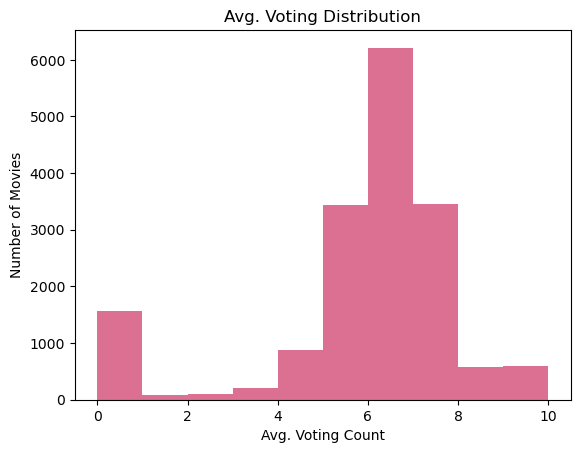

In [17]:
# Visualize avg. voting counts
plt.hist(data['vote_average'],color='palevioletred')
plt.xlabel('Avg. Voting Count')
plt.ylabel('Number of Movies')
plt.title('Avg. Voting Distribution')
plt.show()

Excluding the zero data, the average voting count variable is normally distributed.

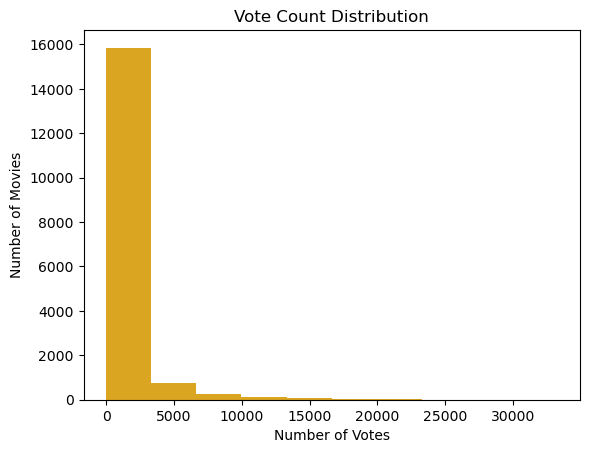

In [18]:
# Visualize the vote counts
plt.hist(data['vote_count'],color='goldenrod')
plt.xlabel('Number of Votes')
plt.ylabel('Number of Movies')
plt.title('Vote Count Distribution')
plt.show()

We can see the following variable is rightly skewed, therefore it will probably be more useful to use the average voting variable in our model instead.